## Activation Functions in PyTorch

In [1]:
# importing the libraries
import torch
import matplotlib.pyplot as plt

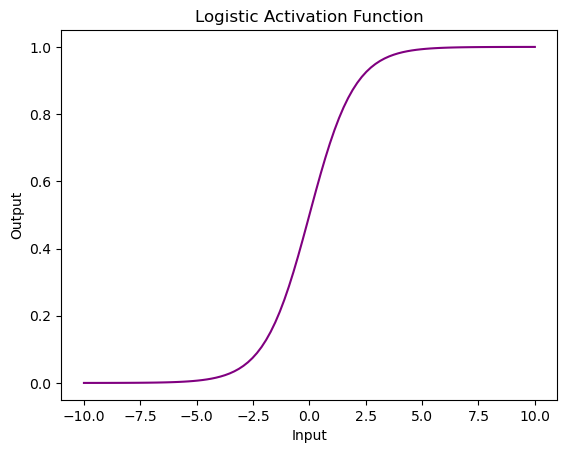

In [2]:
#Logistic Activation Function
# create a PyTorch tensor
x = torch.linspace(-10, 10, 100)

# apply the logistic activation function to the tensor
y = torch.sigmoid(x)

# plot the results with a custom color
plt.plot(x.numpy(), y.numpy(), color='purple')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Logistic Activation Function')
plt.show()

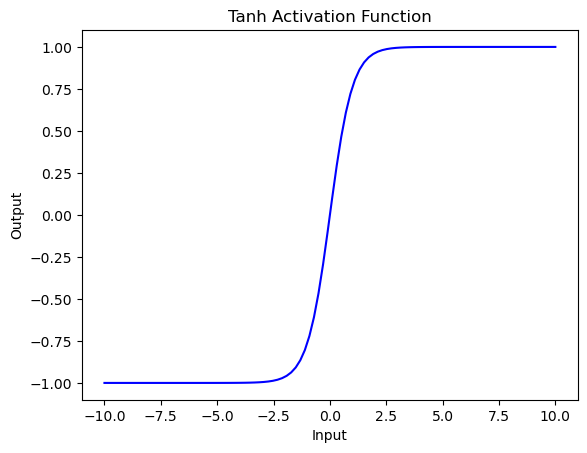

In [3]:
#tanh Activation Function
# apply the tanh activation function to the tensor
y = torch.tanh(x)

# plot the results with a custom color
plt.plot(x.numpy(), y.numpy(), color='blue')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Tanh Activation Function')
plt.show()

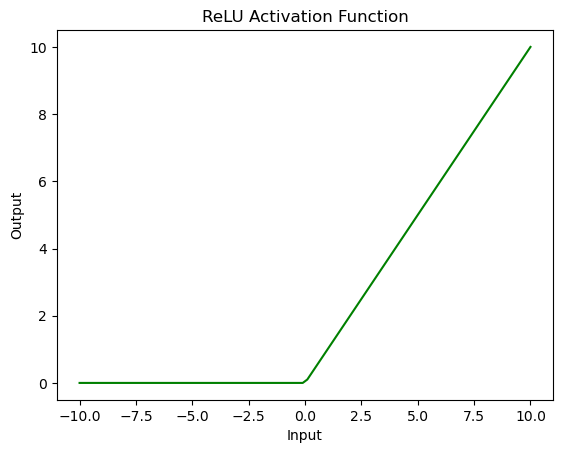

In [4]:
#ReLU Activation Function
# apply the ReLU activation function to the tensor
y = torch.relu(x)

# plot the results with a custom color
plt.plot(x.numpy(), y.numpy(), color='green')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('ReLU Activation Function')
plt.show()

## Exploring Activation Functions in a Neural Network

Activation functions play a vital role in the training of deep learning models, as they introduce non-linearity into the network, enabling it to learn complex patterns.

Take the popular MNIST dataset, which consists of 70000 grayscale images in 28×28 pixels of handwritten digits. You’ll create a simple feedforward neural network to classify these digits, and experiment with different activation functions like ReLU, Sigmoid, Tanh, and Leaky ReLU.

In [6]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Load the MNIST dataset
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='data/', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='data/', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100%|███████████████████████████| 9912422/9912422 [00:00<00:00, 10004078.86it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|████████████████████████████████| 28881/28881 [00:00<00:00, 8085415.42it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 4892240.55it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 6544324.55it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



###### Let’s create a NeuralNetwork class that inherits from nn.Module. This class has three linear layers and an activation function as an input parameter. The forward method defines the forward pass of the network, applying the activation function after each linear layer except the last one. Add an activation_function parameter to the NeuralNetwork class, which allows you to plug in any activation function you’d like to experiment with.

In [7]:
import torch.nn as nn
import torch.optim as optim

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, activation_function):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, num_classes)
        self.activation_function = activation_function

    def forward(self, x):
        x = self.activation_function(self.layer1(x))
        x = self.activation_function(self.layer2(x))
        x = self.layer3(x)
        return x

##### Training and Testing the Model with Different Activation Functions

In [9]:
def train(network, data_loader, criterion, optimizer, device):
    network.train()
    running_loss = 0.0

    for data, target in data_loader:
        data, target = data.to(device), target.to(device)
        data = data.view(data.shape[0], -1)

        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * data.size(0)

    return running_loss / len(data_loader.dataset)

def test(network, data_loader, criterion, device):
    network.eval()
    correct = 0
    total = 0
    test_loss = 0.0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            data = data.view(data.shape[0], -1)

            output = network(data)
            loss = criterion(output, target)
            test_loss += loss.item() * data.size(0)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    return test_loss / len(data_loader.dataset), 100 * correct / total

###### To compare them, let’s create a dictionary of activation functions and iterate over them. For each activation function, you instantiate the NeuralNetwork class, define the criterion (CrossEntropyLoss), and set up the optimizer (Adam). Then, train the model for a specified number of epochs, calling the train() and test() functions in each epoch to evaluate the model’s performance. You store the training loss, testing loss, and testing accuracy for each epoch in the results dictionary.

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = 784
hidden_size = 128
num_classes = 10
num_epochs = 10
learning_rate = 0.001

activation_functions = {
    'ReLU': nn.ReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh(),
    'LeakyReLU': nn.LeakyReLU()
}

results = {}

# Train and test the model with different activation functions
for name, activation_function in activation_functions.items():
    print(f"Training with {name} activation function...")

    model = NeuralNetwork(input_size, hidden_size, num_classes, activation_function).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loss_history = []
    test_loss_history = []
    test_accuracy_history = []

    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, criterion, optimizer, device)
        test_loss, test_accuracy = test(model, test_loader, criterion, device)

        train_loss_history.append(train_loss)
        test_loss_history.append(test_loss)
        test_accuracy_history.append(test_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    results[name] = {
        'train_loss_history': train_loss_history,
        'test_loss_history': test_loss_history,
        'test_accuracy_history': test_accuracy_history
    }

Training with ReLU activation function...
Epoch [1/10], Test Loss: 0.1806, Test Accuracy: 94.36%
Epoch [2/10], Test Loss: 0.1086, Test Accuracy: 96.61%
Epoch [3/10], Test Loss: 0.0868, Test Accuracy: 97.32%
Epoch [4/10], Test Loss: 0.0896, Test Accuracy: 97.29%
Epoch [5/10], Test Loss: 0.0811, Test Accuracy: 97.46%
Epoch [6/10], Test Loss: 0.0797, Test Accuracy: 97.66%
Epoch [7/10], Test Loss: 0.0744, Test Accuracy: 97.77%
Epoch [8/10], Test Loss: 0.0795, Test Accuracy: 97.58%
Epoch [9/10], Test Loss: 0.0806, Test Accuracy: 97.83%
Epoch [10/10], Test Loss: 0.0818, Test Accuracy: 97.71%
Training with Sigmoid activation function...
Epoch [1/10], Test Loss: 0.2479, Test Accuracy: 92.59%
Epoch [2/10], Test Loss: 0.1691, Test Accuracy: 95.02%
Epoch [3/10], Test Loss: 0.1426, Test Accuracy: 95.64%
Epoch [4/10], Test Loss: 0.1183, Test Accuracy: 96.23%
Epoch [5/10], Test Loss: 0.1001, Test Accuracy: 97.06%
Epoch [6/10], Test Loss: 0.0877, Test Accuracy: 97.18%
Epoch [7/10], Test Loss: 0.0934,

###### Use Matplotlib to create plots comparing the performance of each activation function. You can create three separate plots to visualize the training loss, testing loss, and testing accuracy for each activation function over the epochs.

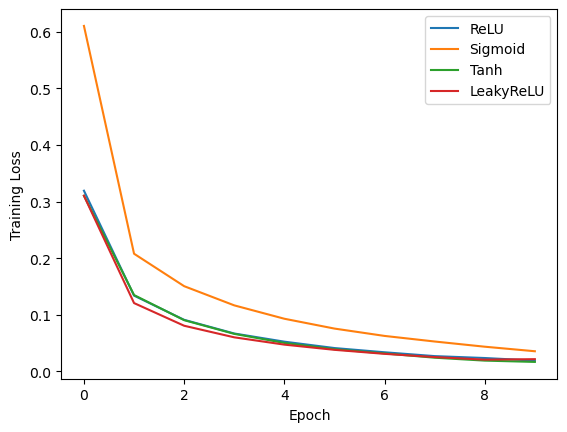

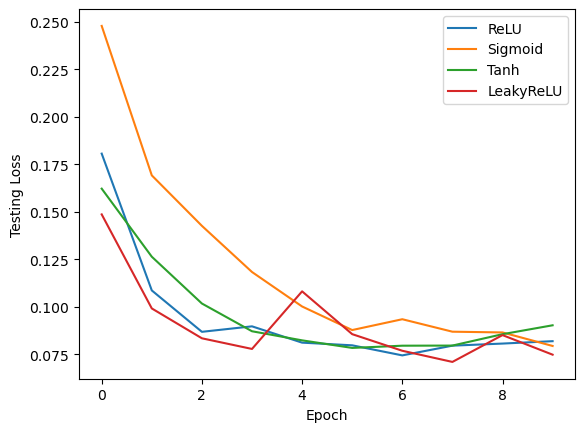

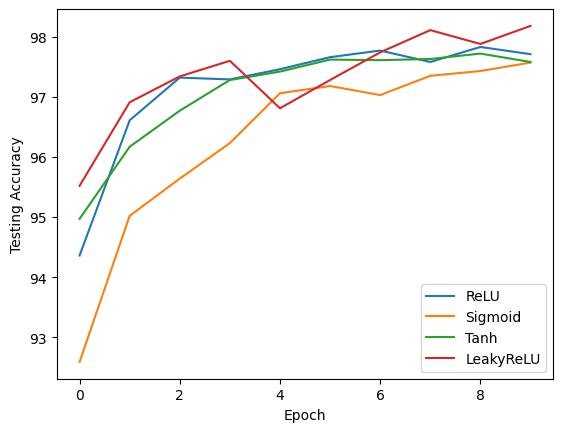

In [11]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.figure()
for name, data in results.items():
    plt.plot(data['train_loss_history'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

# Plot the testing loss
plt.figure()
for name, data in results.items():
    plt.plot(data['test_loss_history'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Testing Loss')
plt.legend()
plt.show()

# Plot the testing accuracy
plt.figure()
for name, data in results.items():
    plt.plot(data['test_accuracy_history'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()